In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("answers.csv")

In [3]:
data.head()

,id,answer,score,correct
0,1.1,High risk problems are address in the prototyp...,3.5,0.0
1,1.1,To simulate portions of the desired final prod...,5.0,1.0
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0
4,1.1,It is used to let the users have a first idea ...,3.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2442 non-null   float64
 1   answer   2442 non-null   object 
 2   score    2442 non-null   float64
 3   correct  2442 non-null   float64
dtypes: float64(3), object(1)
memory usage: 76.4+ KB


### Exploring Data

In [5]:
data["correct"].value_counts()

correct
1.0    1771
0.0     671
Name: count, dtype: int64

<Axes: xlabel='correct', ylabel='count'>

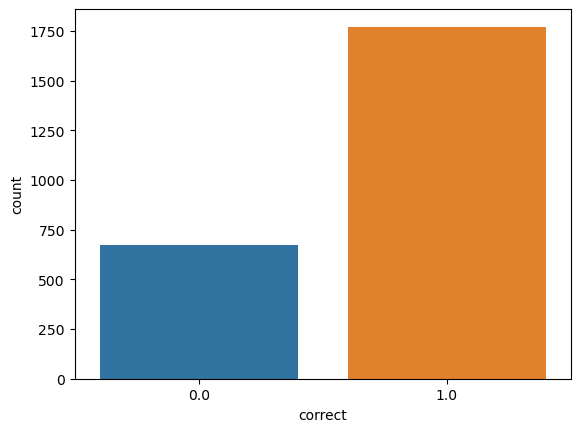

In [6]:
sns.countplot(x=data["correct"])

In [7]:
data["answer letter count"] = data["answer"].apply(len)

In [8]:
data["answer"][14]

'A prototype program provides a basic groundwork from which to further enhance and improve a solution to a problem.'

In [9]:
data["answer letter count"].idxmax() #ID of the answer that has the maximum letter count

354

In [10]:
data.iloc[data["answer letter count"].idxmax()]

id                                                                   2.6
answer                 The FUNCTION PROTOTYPE is where the programmer...
score                                                                2.5
correct                                                              0.0
answer letter count                                                  951
Name: 354, dtype: object

### Pre-processing Data (NLTK Text Data Cleaning)

In [11]:
import nltk

In [12]:
# Download necessary NLTK data
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [14]:
# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
def preprocess_text(text):
    s = re.sub('[^a-zA-Z]'," ",text)
    s=s.lower()
    
    #Tokenization
    tokens = word_tokenize(s)
    
    #Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    pos_tags = pos_tag(filtered_tokens)
    
    # Lemmatize each word based on its POS tag
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    # Join tokens back into a string
    #preprocessed_text = ' '.join(lemmatized_words)
    
    return lemmatized_words

In [16]:
# Apply preprocessing function to the 'text' column
data["processed_text"] = data["answer"].apply(preprocess_text)

In [17]:
print(data["processed_text"][0])

['high', 'risk', 'problem', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', 'prototype', 'may', 'also', 'use', 'show', 'company', 'software', 'possibly', 'program']


In [18]:
#Train the CBOW model
from gensim.models import Word2Vec

In [19]:
# Word2Vec CBOW model
cbow_model = Word2Vec(data['processed_text'], min_count=1, vector_size=100, workers=3, window=5, sg=0)

In [20]:
# Word2Vec Skip Gram model
#skipgram_model = Word2Vec(df['Lemmatized_Text'], min_count=1, size=100, workers=3, window=5, sg=1)

In [21]:
import numpy as np

def get_average_vector(sentence, model, vector_size):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [24]:
data['vector'] = data['processed_text'].apply(lambda x: get_average_vector(x, cbow_model, 100))

In [28]:
data

,id,answer,score,correct,answer letter count,processed_text,vector
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,191,"[high, risk, problem, address, prototype, prog...","[0.01209768, 0.15423259, 0.10418965, -0.152100..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,202,"[simulate, portion, desire, final, product, qu...","[0.0069961916, 0.12026173, 0.08320171, -0.1192..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,116,"[prototype, program, simulate, behavior, porti...","[0.0062373113, 0.13754965, 0.09028406, -0.1344..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,251,"[define, specification, phase, prototype, stim...","[0.008187296, 0.115240075, 0.07982252, -0.1145..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,229,"[use, let, user, first, idea, complete, progra...","[0.009873849, 0.10887188, 0.07146712, -0.10659..."
...,...,...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,5,"[log, n]","[0.020138638, 0.13936602, 0.1007864, -0.132500..."
2438,12.1,minus 1 divided by 2,1.5,0.0,20,"[minus, divide]","[0.006488296, 0.114077345, 0.08077563, -0.1099..."
2439,12.1,2n-1,2.5,0.0,4,[n],"[0.029448032, 0.24688654, 0.18204883, -0.23907..."
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,60,"[take, h, step, h, height, tree]","[0.0048200334, 0.13093777, 0.081907175, -0.122..."


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [31]:
# Split the data into training and test sets
X = np.array(data['vector'].tolist())
y = data['score'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [39]:
# Make predictions on the test set
y_pred = svr_model.predict(X_test)

In [44]:
y_pred[100:110]

array([4.73141343, 4.77807825, 4.86424724, 4.75536033, 4.76153032,
       4.70707456, 4.89237611, 4.83837809, 4.62341311, 4.58127083])

In [45]:
y_test[100:110]

array([3.5, 2.5, 3.5, 5. , 5. , 2. , 5. , 5. , 5. , 5. ])

In [40]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.646028591111105
